In [10]:
!pip install -i https://test.pypi.org/simple/ nayzak-flow==1.0.5
!pip install matrices

Looking in indexes: https://test.pypi.org/simple/
  Found existing installation: nayzak-flow 1.0.3
    Uninstalling nayzak-flow-1.0.3:
      Successfully uninstalled nayzak-flow-1.0.3


In [1]:
import nayzakflow as nf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data_reader= nf.data.CSVReader(
    path= "/content/drive/MyDrive/DeepLearning_data/mnist_train.csv",
    label_col_name='label',
    mode="classification"
)

test_data_reader =  nf.data.CSVReader(
    path= "/content/drive/MyDrive/DeepLearning_data/mnist_test.csv",
    label_col_name='label',
    mode="classification",
    split=0.2
)


(x_train,y_train)= train_data_reader.read_data()
(x_valid,y_valid),(x_test,y_test)= test_data_reader.read_data()

Labels are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Labels are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(8000, 784)
(8000, 1)
(2000, 784)
(2000, 1)


In [4]:
#Normalizing
x_train = x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0

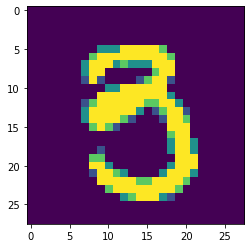

In [5]:
#testing if the images were loaded correctly
plt.imshow(x_train[0].reshape(28,28))

In [6]:
#creating the model
model = nf.nn.layers.Sequential(
    [
        nf.nn.layers.Linear(1024,784,activation='relu'),
        nf.nn.layers.Linear(512,1024,activation='relu'),
        nf.nn.layers.Linear(256,512,activation='relu'),
        nf.nn.layers.Linear(64,256,activation='relu'),
        nf.nn.layers.Linear(10,64,activation='softmax')
    ]
)


#compiling
model.compile(
    loss= nf.nn.loss.SoftmaxLogLikelihood,
    optimizer=nf.optimizer.Adam(lr=0.05),
    metrics= ['accuracy', 'precision','recall' , 'f1-score']
)

Epoch 1/5
loss: 0.06659459709964875.... accuracy: 0.97995    precision: 0.9797918591963599    recall: 0.9798453353444504    f1-score: 0.9797777630872536    val_loss: 0.11132131013840084.... val_accuracy: 1.0    val_precision: 0.1    val_recall: 0.1    val_f1-score: 0.1    

/usr/local/lib/python3.6/dist-packages/nayzakflow/visualize.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(Visualize.rows, Visualize.columns, self.number)


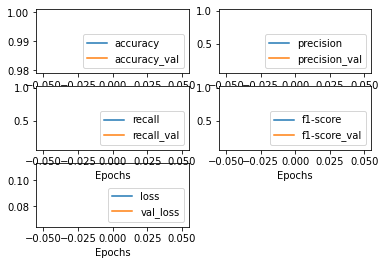


Epoch 2/5
loss: 0.04127044423581832.... accuracy: 0.98765    precision: 0.9875797598424789    recall: 0.987583466729455    f1-score: 0.9875712925382303    val_loss: 0.08713761921345659.... val_accuracy: 1.0    val_precision: 0.1    val_recall: 0.1    val_f1-score: 0.1    

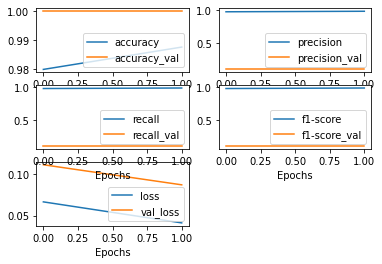


Epoch 3/5
loss: 0.03260430788192914.... accuracy: 0.9897666666666667    precision: 0.9897277671536212    recall: 0.9896738637782263    f1-score: 0.9896915602074193    val_loss: 0.09066403820060222.... val_accuracy: 1.0    val_precision: 0.1    val_recall: 0.1    val_f1-score: 0.1    

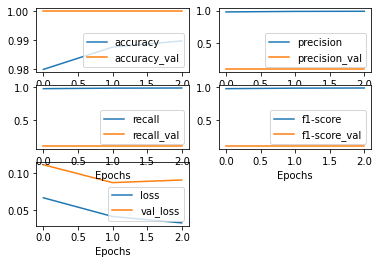


Epoch 4/5
loss: 0.04370458469925025.... accuracy: 0.9861666666666666    precision: 0.9860310978028822    recall: 0.9861044887273065    f1-score: 0.9859664654577756    val_loss: 0.10071947074309726.... val_accuracy: 1.0    val_precision: 0.1    val_recall: 0.1    val_f1-score: 0.1    

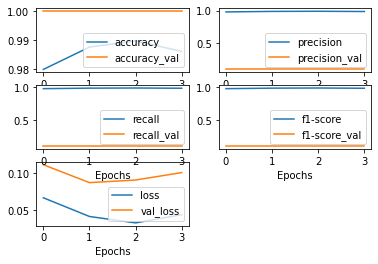


Epoch 5/5
loss: 0.03276658822950282.... accuracy: 0.9902333333333333    precision: 0.990161146181439    recall: 0.9903052099230534    f1-score: 0.9901821313679703    val_loss: 0.12982427192987808.... val_accuracy: 1.0    val_precision: 0.1    val_recall: 0.1    val_f1-score: 0.1    

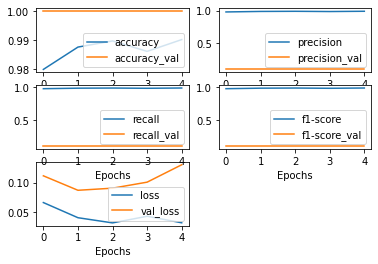

In [7]:
model.fit((x_train,y_train),(x_valid,y_valid) , batch_size=64, epochs=5,plot=True)

   Precision    Recall  F1-Score
0   0.986111  0.986111  0.986111
1   1.000000  0.969163  0.984340
2   0.976415  0.981043  0.978723
3   0.980392  0.975610  0.977995
4   0.979592  0.979592  0.979592
5   0.976331  0.993976  0.985075
6   1.000000  0.989247  0.994595
7   0.983696  0.952632  0.967914
8   0.902655  0.985507  0.942263
9   0.978836  0.943878  0.961039
[[213   0   0   0   0   0   1   0   2   0]
 [  0 220   0   0   0   0   0   0   0   0]
 [  1   0 207   1   2   0   0   1   0   0]
 [  0   0   0 200   0   1   0   1   0   2]
 [  1   0   0   0 192   0   1   1   0   1]
 [  0   0   0   1   0 165   0   0   0   3]
 [  0   0   0   0   0   0 184   0   0   0]
 [  0   0   0   1   0   0   0 181   1   1]
 [  1   7   4   2   0   0   0   4 204   4]
 [  0   0   0   0   2   0   0   2   0 185]]


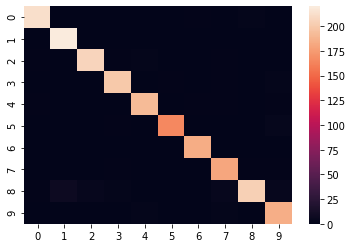

(0.09388211420786818,
 [0.9755, 0.9764028058261447, 0.975675794535352, 0.975764740731593])

In [8]:
model.evaluate(x_test,y_test,True)

In [9]:
#test prediction
i=1
np.argmax(model.predict(np.expand_dims(x_valid[i],axis=0)))

1

In [10]:
y_valid[i]

array([1])

In [11]:
#to save the entire model
model.save_model('/content/drive/MyDrive/DeepLearning_data/mnist_model')

In [12]:
#to load it
new_model = nf.nn.layers.Sequential()
new_model.load_model('/content/drive/MyDrive/DeepLearning_data/mnist_model')
new_model.summary()

      No.      W_Shape Activation  Name
0  Layer1  (1024, 784)       relu  None
1  Layer2  (512, 1024)       relu  None
2  Layer3   (256, 512)       relu  None
3  Layer4    (64, 256)       relu  None
4  Layer5     (10, 64)    softmax  None


In [13]:
new_model.evaluate(x_test,y_test)

   Precision    Recall  F1-Score
0   0.986111  0.986111  0.986111
1   1.000000  0.969163  0.984340
2   0.976415  0.981043  0.978723
3   0.980392  0.975610  0.977995
4   0.979592  0.979592  0.979592
5   0.976331  0.993976  0.985075
6   1.000000  0.989247  0.994595
7   0.983696  0.952632  0.967914
8   0.902655  0.985507  0.942263
9   0.978836  0.943878  0.961039


(0.09388211420786818,
 [0.9755, 0.9764028058261447, 0.975675794535352, 0.975764740731593])

In [15]:
#to save the model weights
model.save_weights('/content/drive/MyDrive/DeepLearning_data/mnist_weights')

In [17]:
#to load the saved weigths

#first we must create the model with the same architecture as the previous

#creating the model
my_model = nf.nn.layers.Sequential(
    [
        nf.nn.layers.Linear(1024,784,activation='relu'),
        nf.nn.layers.Linear(512,1024,activation='relu'),
        nf.nn.layers.Linear(256,512,activation='relu'),
        nf.nn.layers.Linear(64,256,activation='relu'),
        nf.nn.layers.Linear(10,64,activation='softmax')
    ]
)


#compiling
my_model.compile(
    loss= nf.nn.loss.SoftmaxLogLikelihood,
    optimizer=nf.optimizer.Adam(lr=0.05),
    metrics= ['accuracy', 'precision','recall']
)


#load the weights
my_model.load_weights('/content/drive/MyDrive/DeepLearning_data/mnist_weights')